In [38]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import h5py
import matplotlib.pyplot as plt

from mnist_model import load_mnist_model
from attack_generator import generate_attacks


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:

DATASET_DIR = '../datasets/mnist/'

import yaml

def load_yaml_file(file_path):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print(f"Error loading YAML file {file_path}: {e}")
            return None

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to the range [-1, 1]
])
model = load_mnist_model()
test_data = torchvision.datasets.MNIST(root='../datasets/mnist/', train=False, download=True, transform=transform)

# Step 2: Data Loader
batch_size = 64
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
model.eval()


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [40]:
attack_list = ['virtual_adv']
# 'fsgm', 'deep_fool', 'pgm', 'jsma', 'virtual_adv', 'wasserstein
max_pixel_value = 1.0
min_pixel_value = -1.0
target_class=5
input_shape=(28,28)
num_classes=10
attack_config_dict = load_yaml_file('attack_config.yml')

In [41]:
x_adv_dict = generate_attacks(model, test_loader, input_shape=input_shape, 
                              target_class=None, 
                              num_classes=num_classes, attack_list=['virtual_adv'], 
                              attack_config_dict=attack_config_dict, 
                              min_pixel_value=min_pixel_value, num_samples=64)
                             

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

VAT:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [23]:
 max_pixel_value=max_pixel_value)

SyntaxError: unmatched ')' (2103655058.py, line 1)

In [ ]:
def read_hdf5_dataset(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        # Check if the dataset exists in the file
        if dataset_name in file:
            dataset = file[dataset_name]
            
            # Access the data in the dataset (assuming it's a 1D array)
            data = dataset[:]
            return data
            # You can now use the 'data' variable for further processing
            
        else:
            print(f"Dataset '{dataset_name}' not found in the file.")
    

In [ ]:
len(x_adv_dict['carl'])

In [ ]:
import numpy as np
def plot_mnist_samples(dataset, num_rows=20, num_cols=10):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
    for i in range(num_rows):
        for j in range(num_cols):
            index = np.random.randint(len(dataset))
            image= dataset[index]
            axes[i, j].imshow(image.squeeze().numpy(), cmap='gray')
            axes[i, j].axis('off')
    plt.show()

# Load MNIST data
mnist_dataset = torch.Tensor(x_adv_dict['carlini_l2'])

# Plot a grid of samples
plot_mnist_samples(mnist_dataset, num_rows=20, num_cols=10)

In [ ]:
a = np.random.normal(size=(10,1,28,28))

In [ ]:
l = [a,a,a,a]

In [ ]:
sample = np.array(l).reshape(-1, 1, 28,28)

In [ ]:
sample.shape

In [ ]:
s = (1,28,28)

In [ ]:
a = (-1, *s)

In [ ]:
a

In [198]:

current_datetime = datetime.now()

# Convert the current datetime to a timestamp
timestamp = current_datetime.timestamp()

print(f"Current Date and Time: {current_datetime}")
print(f"Timestamp: {timestamp}")

Current Date and Time: 2023-11-14 14:05:47.253659
Timestamp: 1699999547.253659


In [204]:
datetime_object = datetime.utcfromtimestamp(timestamp)

# Format the datetime object as a string
formatted_datetime = datetime_object.strftime('%Y%m%d%H%M%S')

In [205]:
formatted_datetime

'20231114220547'

In [19]:
a = torch.randn(size=(7,1,28,28))

In [22]:
a.permute(1,0,2,3).size()

torch.Size([1, 7, 28, 28])

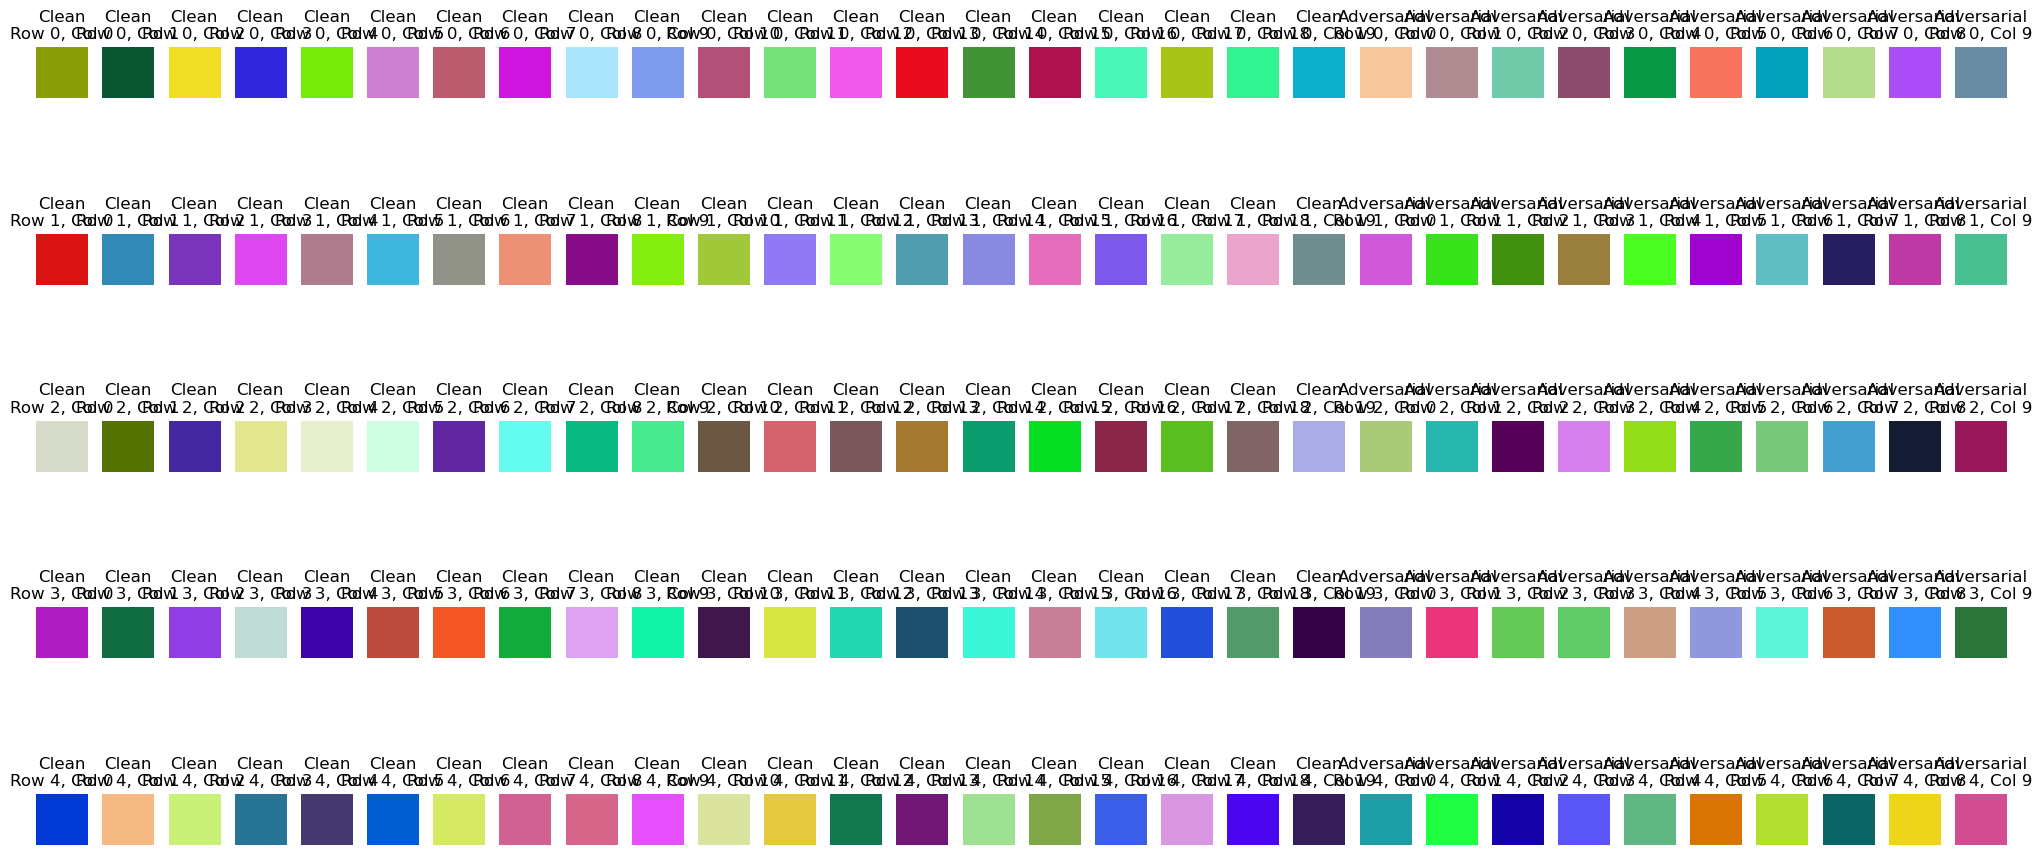

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create synthetic data (replace with your actual data)
clean_samples = np.random.rand(5, 20, 3)
adversarial_samples = np.random.rand(5, 10, 3)

# Create a subplot with 5x30 (5 rows and 30 columns)
fig, axes = plt.subplots(nrows=5, ncols=30, figsize=(20, 10))

# Plot clean samples on the left side
for i in range(5):
    for j in range(20):
        axes[i, j].imshow(clean_samples[i, j, :].reshape((1, 1, 3)))
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Clean\nRow {i}, Col {j}')

# Plot adversarial samples on the right side
for i in range(5):
    for j in range(10):
        axes[i, j + 20].imshow(adversarial_samples[i, j, :].reshape((1, 1, 3)))
        axes[i, j + 20].axis('off')
        axes[i, j + 20].set_title(f'Adversarial\nRow {i}, Col {j}')

plt.tight_layout()
plt.show()


(0.0, 1.0, 0.0, 1.0)

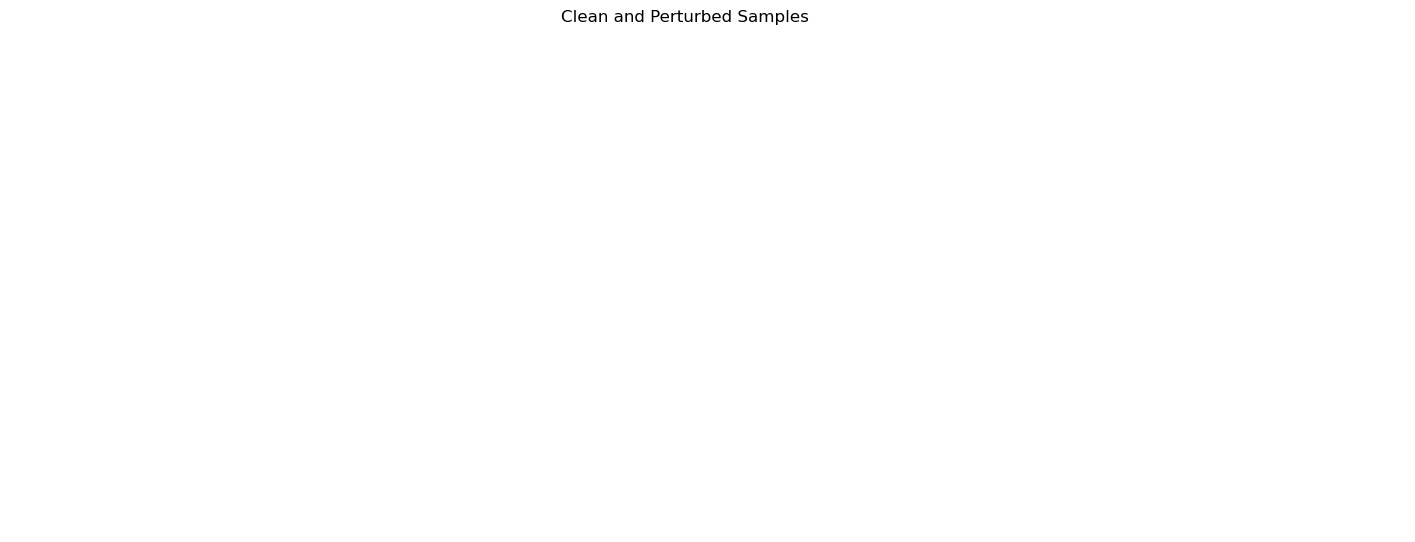

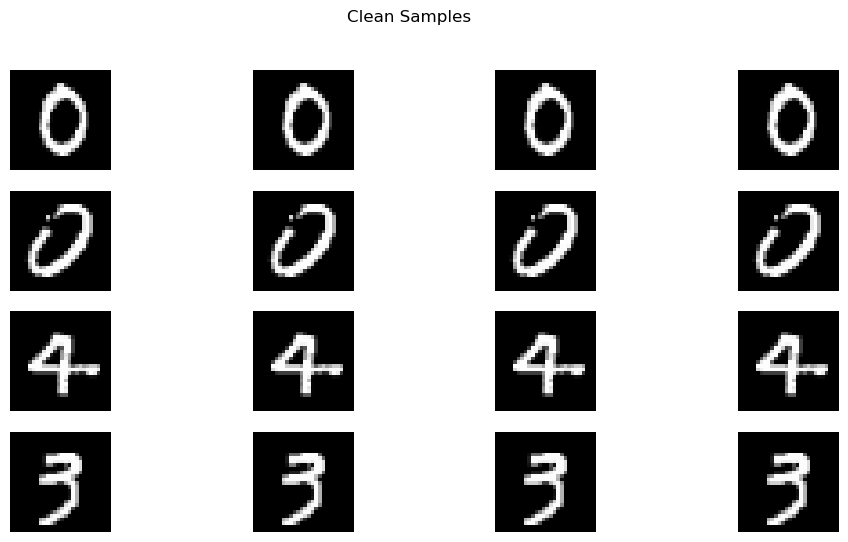

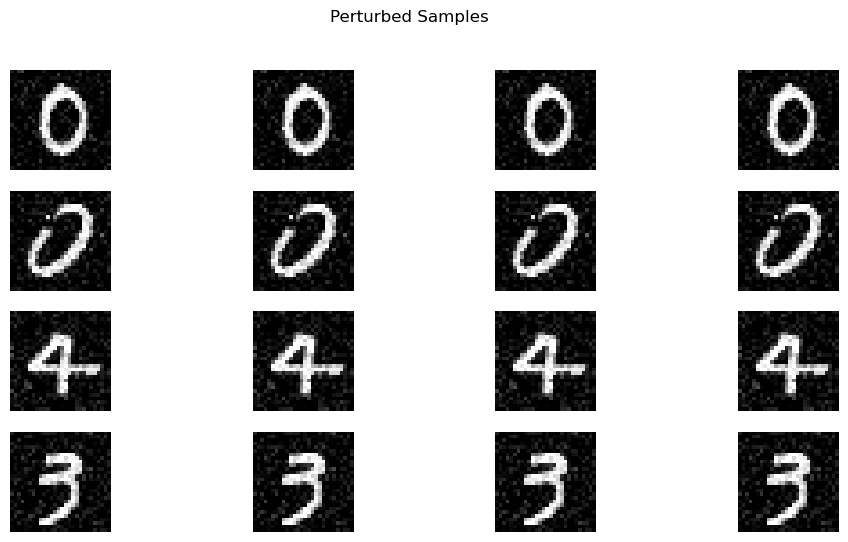

In [12]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=1, shuffle=True)

# Function to generate random perturbation
def random_perturbation(image, epsilon=0.1):
    perturbation = epsilon * torch.randn_like(image)
    perturbed_image = torch.clamp(image + perturbation, 0, 1)
    return perturbed_image

# Function to visualize samples
def visualize_samples(samples, num_rows, num_cols, title):
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))
    fig.suptitle(title)

    for i in range(num_rows):
        for j in range(num_cols):
            axes[i, j].imshow(samples[i].squeeze(), cmap='gray')
            axes[i, j].axis('off')
    return fig, axes

# Create subplots for clean and perturbed samples
num_rows = 4
num_cols = 4

# Get 8 clean and perturbed samples
clean_samples = []
perturbed_samples = []

for i, (image, _) in enumerate(mnist_loader):
    if len(clean_samples) < num_rows:
        clean_samples.append(image)
    
    perturbed_image = random_perturbation(image)
    if len(perturbed_samples) < num_rows:
        perturbed_samples.append(perturbed_image)

    if len(clean_samples) >= num_rows and len(perturbed_samples) >= num_rows:
        break

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Clean and Perturbed Samples")

# Plot clean samples on the left
ax1= visualize_samples(clean_samples, num_rows, num_cols, "Clean Samples")
axes[0].axis('off')

# Plot perturbed samples on the right
ax2 = visualize_samples(perturbed_samples, num_rows, num_cols, "Perturbed Samples")
axes[1].axis('off')





In [13]:
ax_h123 = ax1 | ax2 


TypeError: unsupported operand type(s) for |: 'tuple' and 'tuple'

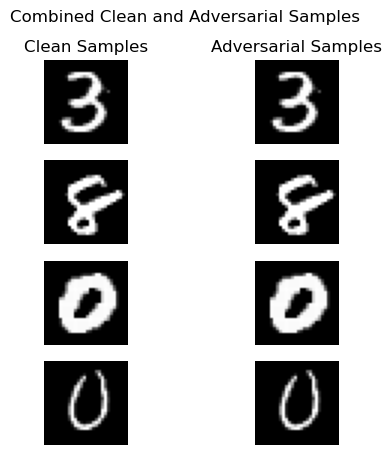

In [101]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=1, shuffle=True)

# Function to generate adversarial examples using FGSM
def fgsm_attack(image, epsilon, data_grad):
    perturbed_image = image + epsilon * data_grad.sign()
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# Function to visualize samples
def visualize_combined_samples(clean_samples, adversarial_samples, title, save_path):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(5,5))
    fig.suptitle(title)

    # Plot clean samples on the left
    for i in range(4):
        axes[i, 0].imshow(clean_samples[i ].squeeze(), cmap='gray')
        axes[i,0].axis('off')
        if i ==0:
            axes[i, 0].set_title(f'Clean Samples')
    

    for i in range(4):
        axes[i, 1].imshow(adversarial_samples[i].squeeze(), cmap='gray')
        axes[i,1].axis('off')
        if i ==0:
            axes[i, 1].set_title(f'Adversarial Samples')
    
    plt.savefig(save_path)

# Create subplots for clean and adversarial samples
epsilon = 0.1  # Adjust the epsilon value for FGSM attack

clean_samples = []
adversarial_samples = []

for i, (image, label) in enumerate(mnist_loader):
    # Clean samples
    if len(clean_samples) < 16:
        clean_samples.append(image)

    # Adversarial samples usi

    if len(adversarial_samples) < 16:
        adversarial_samples.append(image +1)

    if len(clean_samples) >= 16 and len(adversarial_samples) >= 16:
        break

# # Visualize the combined subplots
visualize_combined_samples(clean_samples, adversarial_samples, "Combined Clean and Adversarial Samples")


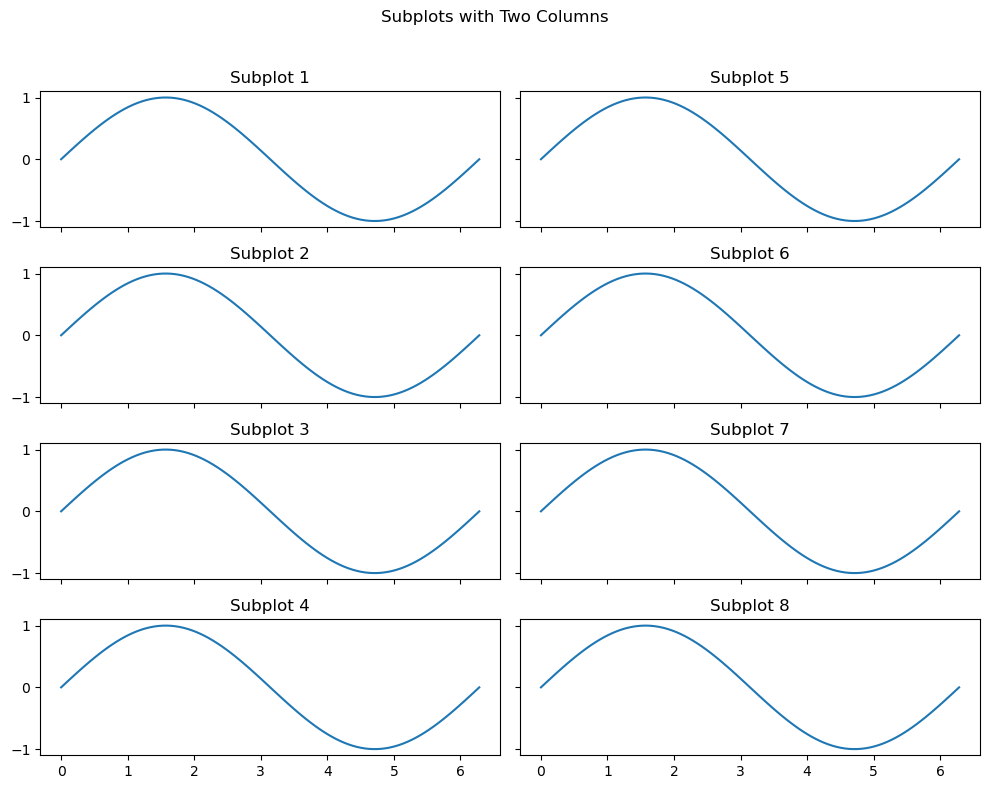

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a subplot with two columns, each containing 4x4 subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 8), sharex=True, sharey=True)

# Iterate through each column
for col in range(2):
    # Iterate through each row in the column
    for row in range(4):
        # Calculate the subplot index
        idx = col * 4 + row + 1
        
        # Plot on the current subplot
        axs[row, col].plot(x, y)
        axs[row, col].set_title(f'Subplot {idx}')

# Add a title for the entire figure
fig.suptitle('Subplots with Two Columns')

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


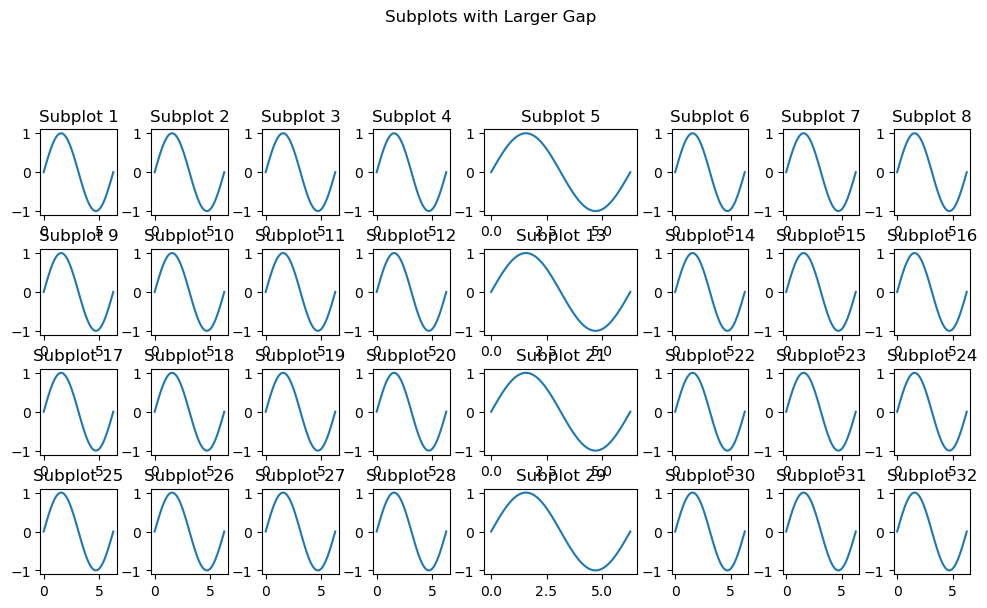

In [74]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a 8x8 subplot grid with larger gap between column 4 and 5
fig = plt.figure(figsize=(12, 12))

# Define the grid layout using gridspec
gs = gridspec.GridSpec(8, 8, wspace=0.4, hspace=0.4, width_ratios=[1, 1, 1, 1, 2, 1, 1, 1], height_ratios=[1, 1, 1, 1, 1, 1, 1, 1])

# Plot on the subplots
for i in range(32):
    ax = plt.subplot(gs[i])
    ax.plot(x, y)
    ax.set_title(f'Subplot {i + 1}')

# Add a title for the entire figure
fig.suptitle('Subplots with Larger Gap')

# Show the plot
plt.show()

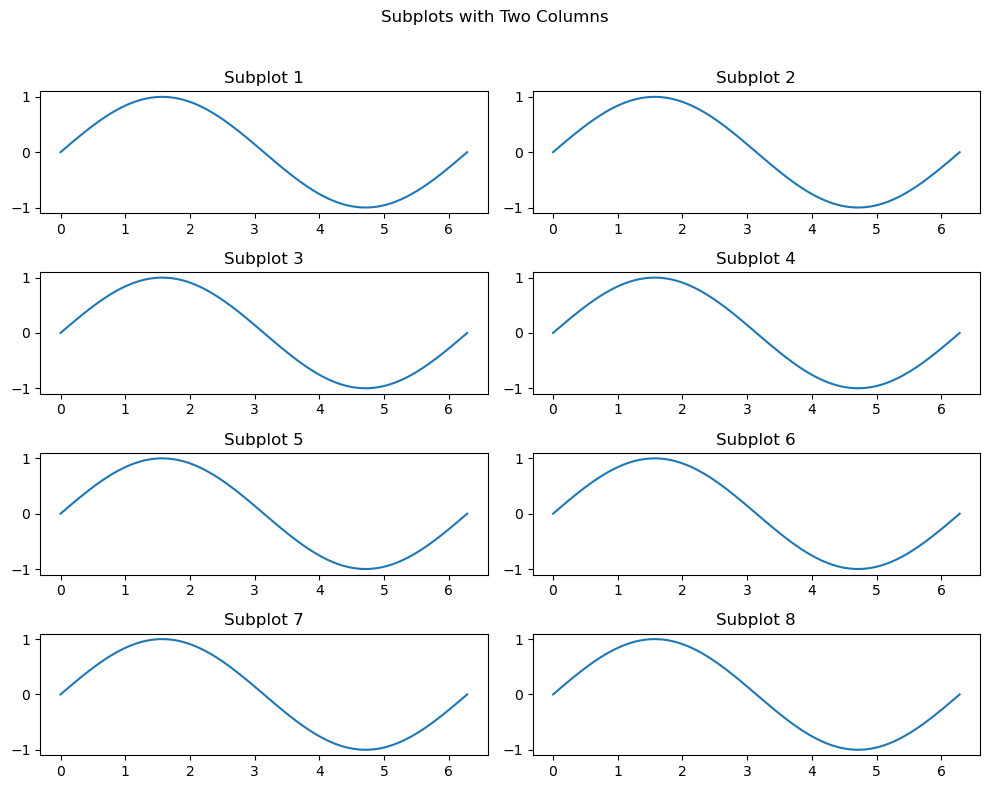

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a subplot with two columns, each containing a 4x4 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 8))

# Plot on the first column
for i in range(4):
    for j in range(2):
        ax = axs[i, j]
        ax.plot(x, y)
        ax.set_title(f'Subplot {i * 2 + j + 1}')

# Add a title for the entire figure
fig.suptitle('Subplots with Two Columns')

# Adjust layout to prevent title clipping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [104]:
x = 1234
y = 4321
import math

In [ ]:
10^(log10(A) + log10(B))

In [108]:

x_sq = 10**(math.log10(x) + math.log10(x))

In [109]:
x*x

1522756

In [110]:
x_sq

1522755.9999999995

In [124]:
out1 = (math.log10(x) + math.log10(x))
out2 = (math.log10(x) + math.log10(y))
out3 = (math.log10(y) + math.log10(y))

In [128]:
10**out1

1522755.9999999995

In [130]:
def karatsuba(x, y):
    # Base case: if the numbers are single-digit, use the standard multiplication
    if x < 10 or y < 10:
        return x * y

    # Calculate the number of digits in the numbers
    n = max(len(str(x)), len(str(y)))
    m = n // 2

    # Split the numbers into two halves
    high1, low1 = divmod(x, 10**m)
    high2, low2 = divmod(y, 10**m)

    # Recursive steps
    z0 = karatsuba(low1, low2)
    z1 = karatsuba((low1 + high1), (low2 + high2))
    z2 = karatsuba(high1, high2)

    # Calculate the final result using the recursive results
    return (z2 * 10**(2 * m)) + ((z1 - z2 - z0) * 10**m) + z0

# Example usage
num1 = 1234567890123456
num2 = 9876543210987654

result = karatsuba(x, y)
result_2 = karatsuba(x,x)
result_3 = karatsuba(y,y)
print("Product:", result + result_2 + result_3)

Product: 25525911


In [113]:
x*x + x*y + y*y

25525911